<a href="https://colab.research.google.com/github/si1242/machine_leraning_experiments/blob/master/20200605_comparison_qiita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numpyで特定のindex以外を抽出する方法

[Numpyで特定のindex以外を抽出する方法 - Qiita](https://qiita.com/si1242/items/96b0db9863003d8f7866)

In [0]:
import numpy as np
np.random.seed(0)

In [2]:
arr = np.random.randint(0, 100, 10)
print(arr)

# 奇数indexの数値をarrから除外したい
odd = [1,3,5,7,9]

[44 47 64 67 67  9 83 21 36 87]


In [3]:
# 方法① リスト内包表記
index = [i for i in np.arange(len(arr)) if i not in odd]
arr_even = arr[index]
print(arr_even)

[44 64 67 83 36]


In [4]:
# 方法② True/Falseでマスキングする
index = np.ones(len(arr), dtype=bool)
index[odd] = False
arr_even = arr[index]
print(arr_even)

[44 64 67 83 36]


In [5]:
# 方法③ np.delete
arr_even = np.delete(arr, odd)

print(arr_even)

[44 64 67 83 36]


## 性能比較実験

In [6]:
!pip install japanize-matplotlib
!pip install perfplot

In [7]:
%%time

import perfplot

import matplotlib.pyplot as plt

# Retinaディスプレイ対応
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 9)

# 黒背景用
plt.style.use('dark_background')

import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定



def func1(arr, odd):
    index = [i for i in np.arange(len(arr)) if i not in odd]
    arr_even = arr[index]
    return arr_even


def func2(arr, odd):
    index = np.ones(len(arr), dtype=bool)
    index[odd] = False
    arr_even = arr[index]
    return arr_even


def func3(arr, odd):
    arr_even = np.delete(arr, odd)
    return arr_even


ppdata = perfplot.bench(
    setup=lambda n: np.random.randint(0, 100, n),
    n_range=[2 ** k for k in range(19)],
    kernels=[
        lambda arr: func1(arr, np.arange(1, len(arr), 2)),
        lambda arr: func2(arr, np.arange(1, len(arr), 2)),
        lambda arr: func3(arr, np.arange(1, len(arr), 2)),
    ],
    labels=['方法①', '方法②', '方法③'],
    equality_check=np.allclose,
    xlabel='len(arr)',
)


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
100%|██████████| 19/19 [01:52<00:00,  5.94s/it]

CPU times: user 1min 52s, sys: 440 ms, total: 1min 53s
Wall time: 1min 53s


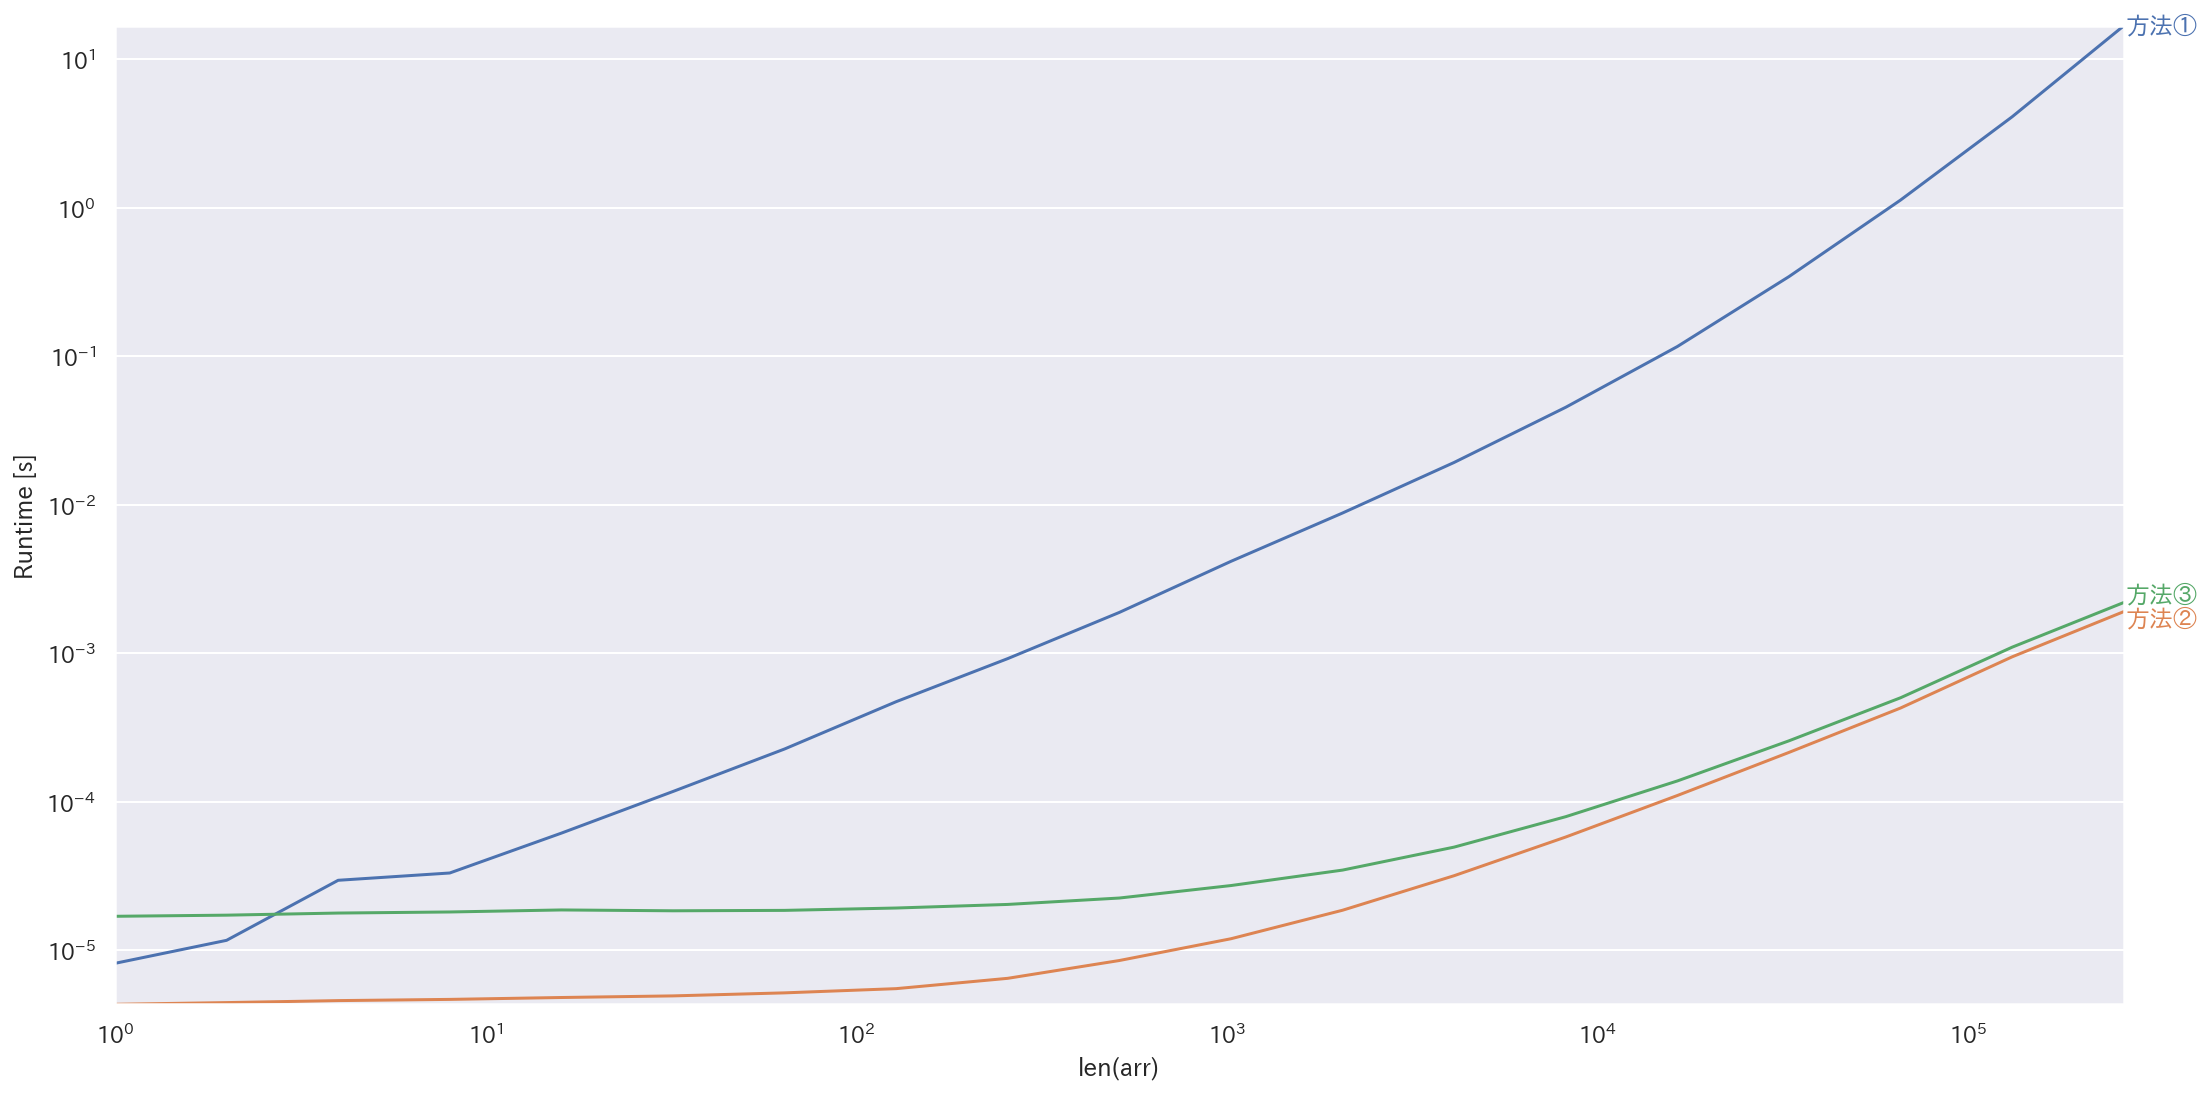

In [8]:
ppdata.show(time_unit="s")